# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

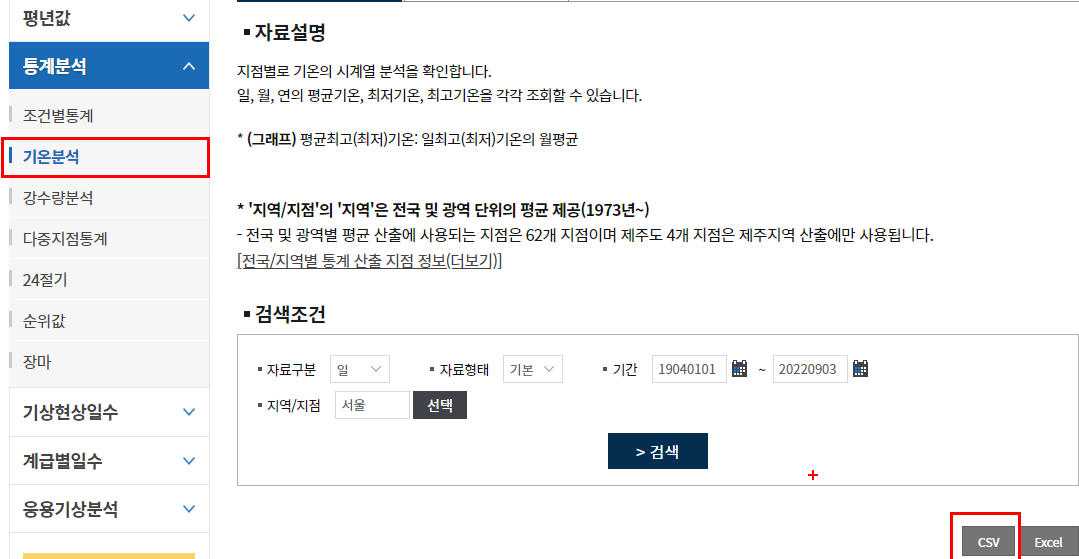

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 로드

ParserError: csv 포맷이 맞지 않는 경우. 즉 (콤마)로 구분되어 있지 않아서
csv 파일에서 머릿글 영역을 삭제 후 저장해서 사용

In [6]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 데이터 살펴보기

In [7]:
df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


|t 가 들어가 있음
메모장에서 문자열 바꾸기 기능을 이용해서 |t를 없애기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41873 entries, 0 to 41872
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41873 non-null  object 
 1   지점       41873 non-null  int64  
 2   평균기온(℃)  41117 non-null  float64
 3   최저기온(℃)  41114 non-null  float64
 4   최고기온(℃)  41114 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
df.size
df.shape

(41873, 5)

1. 행 수: 41873
2. 컬럼 수: 5 
3. 각 피쳐 타입의 적절성: 날짜가 object???
4. 결측치 유무: 평균기온, 최저기온, 최고기온

In [11]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41873.0,41117.000000,41114.000000,41114.000000
mean,108.0,11.780434,7.489592,16.784022
std,0.0,10.657738,10.885392,10.973236
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.800000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [12]:
df.tail()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
41868,2023-07-23,108,25.2,24.5,25.8
41869,2023-07-24,108,26.9,24.6,30.0
41870,2023-07-25,108,27.8,25.8,30.5
41871,2023-07-26,108,27.6,24.9,31.1
41872,2023-07-27,108,28.4,24.4,32.2


## 결측 데이터 전처리

### 결측데이터수 파악하기

In [15]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [18]:
# 평균기온 결측치인 날짜
cond = df['평균기온(℃)'].isnull()
df[cond]


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16427,1953-11-26,108,NaN,NaN,NaN
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN


In [19]:
# 최저기온 결측치인 날짜
cond2 = df['최저기온(℃)'].isnull()
df[cond2]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


50 ~ 53년은 전쟁 때문.
67년 73년 22년은 왜 때문에?

In [20]:
# 2017년에도 결측치 있네...
cond3 = df['최고기온(℃)'].isnull()
df[cond3]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


### 결측치 데이터 처리


In [38]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움
# Series.fillna(채우는 값)

df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)



0

In [31]:
df.isna().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [32]:
df.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [35]:
#결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인
df.info()
cond = df['날짜'].str.contains('1950')
df[cond]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41873 entries, 0 to 41872
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41873 non-null  object 
 1   지점       41873 non-null  int64  
 2   평균기온(℃)  41873 non-null  float64
 3   최저기온(℃)  41873 non-null  float64
 4   최고기온(℃)  41873 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


ValueError: Cannot mask with non-boolean array containing NA / NaN values

## 컬럼명 바꾸기

In [39]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [41]:
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
df.columns

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')

## 서울에서 가장 더웠던 날은?

In [52]:
#최고 더운 날은?
#max_tem = df['최고기온'].max()
#max_tem
max_tem = df.sort_values(by='최고기온', ascending=False)
max_tem


,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
13111,1943-08-24,108,29.0,23.2,38.2
11636,1939-08-10,108,30.1,24.5,38.2
...,...,...,...,...,...
8503,1931-01-11,108,-17.4,-22.5,-14.7
2661,1915-01-13,108,-19.2,-21.3,-16.3
39758,2017-10-12,108,11.4,8.8,-999.0
21260,1967-02-19,108,-1.7,999.0,-999.0


In [58]:
a = max_tem.head(1)['날짜'].values[0]
b = max_tem.head(1)['최고기온'].values[0]

In [59]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
print(a,':', b)

2018-08-01 : 39.6


In [60]:
max_tem.iloc[0,0], max_tem.iloc[0,4]

('2018-08-01', 39.6)

# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [61]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.head()

# 결측치 처리
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)




In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41873 entries, 0 to 41872
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41873 non-null  object 
 1   지점       41873 non-null  int64  
 2   평균기온(℃)  41873 non-null  float64
 3   최저기온(℃)  41873 non-null  float64
 4   최고기온(℃)  41873 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


## 내 생일 데이터만 추출

In [74]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출
df.loc[df['날짜'] == '1999-07-11']
birth = df['날짜'].str.contains('-07-11')
df[birth]

# df[df['날짜].str.contains('-07-11')]
# birth_df = 위에것


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
284,1908-07-11,108,23.8,20.1,29.2
649,1909-07-11,108,22.5,20.4,25.0
1014,1910-07-11,108,22.6,20.1,27.0
1379,1911-07-11,108,23.2,21.3,27.8
1745,1912-07-11,108,24.7,21.1,29.8
...,...,...,...,...,...
40395,2019-07-11,108,21.9,19.5,25.9
40761,2020-07-11,108,25.8,22.2,30.2
41126,2021-07-11,108,25.7,24.1,27.5
41491,2022-07-11,108,27.0,24.7,30.6


## 필요한 컬럼만 추출

In [90]:
a = df[birth][['날짜', '최고기온(℃)']]
#df[birth][['날짜']].values
#df[birth][['최고기온(℃)']].values
a.head()


,날짜,최고기온(℃)
284,1908-07-11,29.2
649,1909-07-11,25.0
1014,1910-07-11,27.0
1379,1911-07-11,27.8
1745,1912-07-11,29.8


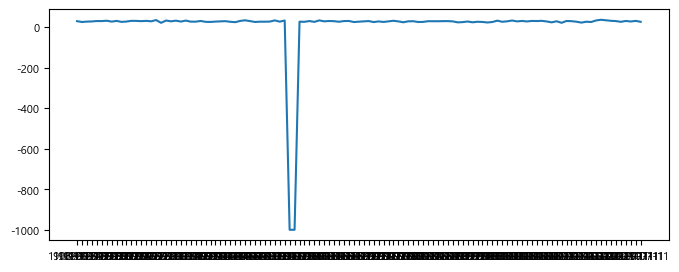

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 기본 스타일
## 폰트 설정 및 마이너스 부호 설정
#plt.rc('font', family='NanumSquare') #나눔 글꼴로 설정
plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.size'] = 8

x = a['날짜'].values
y = a['최고기온(℃)'].values
plt.plot(x,y)
plt.show()

In [94]:
a[a['최고기온(℃)'] < 5]

,날짜,최고기온(℃)
15955,1952-07-11,-999.0
16289,1953-07-11,-999.0


'''
결측치 채우기 할 때 최고기온에 대해 -999도로 일괄 적용했음.
그런데 문제임.....
따라서 제거해서 진행해 보기로 하자.
'''

## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [2]:
#라이브러리 임포트
# 데이터 로딩
# 결측치 처리


#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.head()

df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']

df.head()




,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [3]:
# 결측 데이터 삭제
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

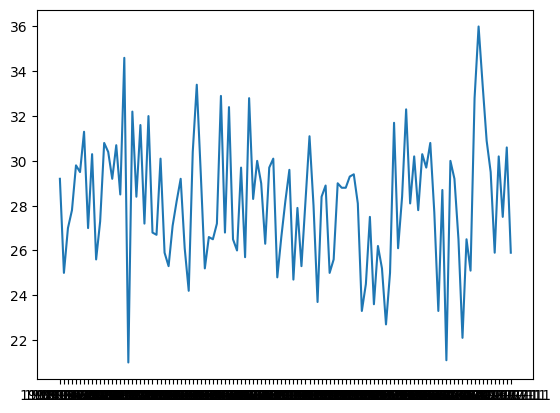

In [5]:
df.loc[df['날짜'] == '1999-07-11']
birth = df['날짜'].str.contains('-07-11')
df[birth]

a = df[birth][['날짜', '최고기온']]

x = a['날짜'].values
y = a['최고기온'].values
plt.plot(x,y)
plt.show()

## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

In [9]:
cond = (df['날짜'] >= '1980-07-11') & (df['날짜'].str.contains('-07-11'))
birth_df = df[cond]
birth_df.head()

,날짜,지점,평균기온,최저기온,최고기온
26151,1980-07-11,108,24.0,21.9,29.0
26516,1981-07-11,108,23.3,19.5,28.8
26881,1982-07-11,108,24.3,22.2,28.8
27246,1983-07-11,108,24.1,19.9,29.3
27612,1984-07-11,108,25.7,22.6,29.4


In [10]:
# 필요한 컬럼만 추출
birth_df = birth_df[['날짜', '평균기온']]

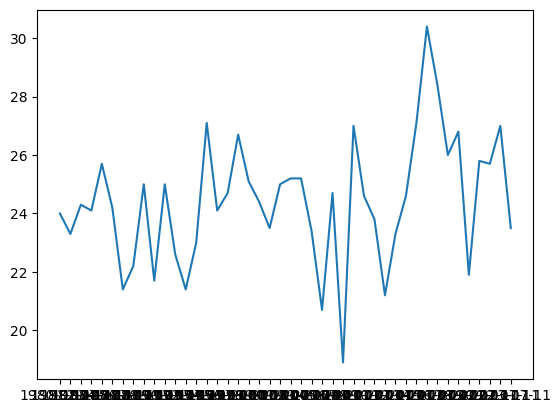

In [11]:
# 내 생일 데이터 그래프 그리기
x = birth_df['날짜'].values
y = birth_df['평균기온'].values
plt.plot(x,y)
plt.show()

## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [16]:
# 날짜 컬럼 타입 확인


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       41863, 41864, 41865, 41866, 41867, 41868, 41869, 41870, 41871, 41872],
      dtype='int64', length=41113)

### object -> datetime64[ns] 형변환

In [18]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
# 파생변수 (년, 월, 일)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41113 entries, 0 to 41872
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41113 non-null  datetime64[ns]
 1   지점      41113 non-null  int64         
 2   평균기온    41113 non-null  float64       
 3   최저기온    41113 non-null  float64       
 4   최고기온    41113 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.9 MB


In [24]:
# 파생변수 (년, 월, 일)
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [25]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


### 내 생일이면서 1980년 이후의 데이터만 추출

In [29]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
cond = (df['년'] >= 1980) & (df['월'] == 7) & (df['일'] == 11) 
birth_df = df[cond]

In [31]:
# 필요한 컬럼만 추출
birth_df = birth_df.loc[:,['날짜', '평균기온']]


## 그래프 그리기

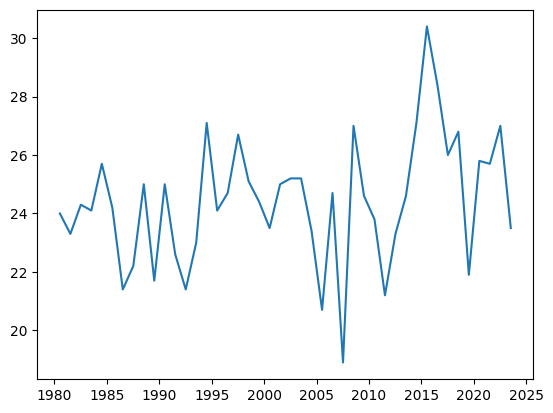

In [32]:
# 내 생일 데이터 그래프 그리기
x = birth_df['날짜'].values
y = birth_df['평균기온'].values
plt.plot(x,y)
plt.show()

In [ ]:
# X축에 날짜가 나오도록해서 다시 출력


# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

In [34]:
# 관측이래 매년 크리스마스
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.head()

# 데이터 전처리
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']

# 결측치 제거
df.dropna(inplace=True)

# 행 변화
df['날짜'] = pd.to_datetime(df['날짜'])

# 파생변수 생성
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [40]:
cond = (df['월'] == 12) & (df['일'] == 25)
chris_df = df[cond]
chris_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
85,1907-12-25,108,3.5,1.1,6.8,1907,12,25
451,1908-12-25,108,-0.3,-6.6,6.3,1908,12,25
816,1909-12-25,108,-9.9,-12.5,-6.0,1909,12,25
1181,1910-12-25,108,-0.5,-4.1,0.6,1910,12,25
1546,1911-12-25,108,-1.8,-5.4,0.7,1911,12,25


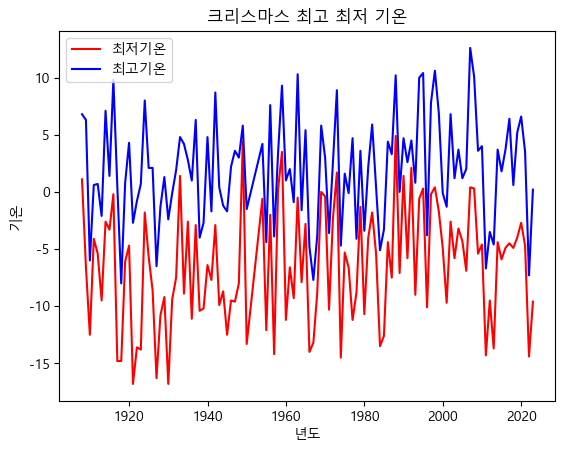

In [45]:
x = chris_df['날짜'].values
y = chris_df['최저기온'].values
y2 = chris_df['최고기온'].values

plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rcParams['axes.unicode_minus'] = False #부호

plt.plot(x,y, 'r', label = '최저기온')
plt.plot(x, y2, 'b', label = '최고기온')
plt.title('크리스마스 최고 최저 기온')
plt.xlabel('년도')
plt.ylabel('기온')
plt.legend()
plt.show()

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

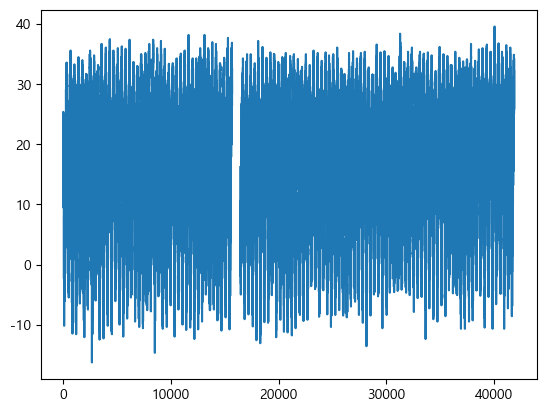

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

y = df['최고기온']
plt.plot(y)
plt.show()

<Axes: >

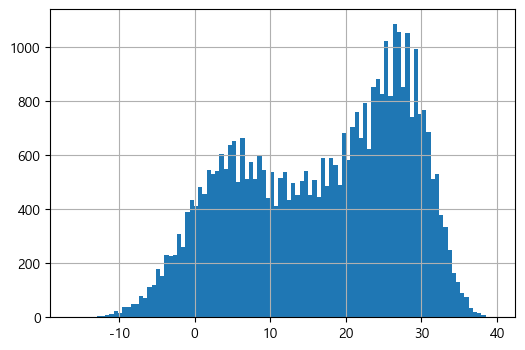

In [56]:
df['최고기온'].hist(bins=100)

왜 낙타등처럼 보이는 걸까?

겨울과 여름 계절의 패턴이 이렇게 나타난걸까요?

한 계절만 따로 추출해서 분석해봐야 알 것 같아요.

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

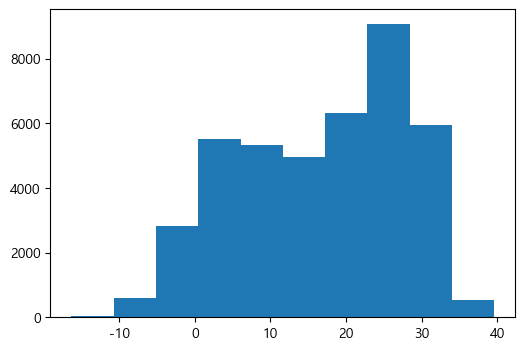

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

x = df['최고기온']
plt.hist(x)
plt.show()


## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

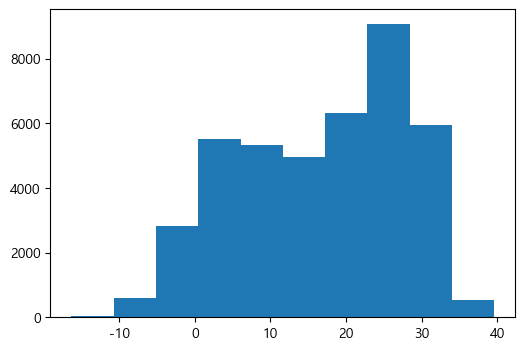

In [57]:
# 위에 데이터 로드
# 결측치 처리
# 형변환


import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

df = pd.read_csv('./data/ta_20230728120831_utf-8.csv.txt')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

x = df['최고기온']
plt.hist(x)
plt.show()

# 결측치 제거
df.dropna(inplace=True)

# 행 변화
df['날짜'] = pd.to_datetime(df['날짜'])

# 파생변수 생성
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [60]:
# 8월 데이터만 추출
cond = (df['월'] == 8)
aug_df = df[cond]


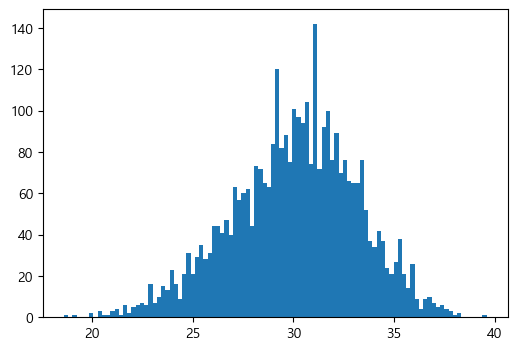

In [61]:
# hist(데이터, 몇개구간, 색깔)
x = aug_df['최고기온']
plt.hist(x, bins = 100)
plt.show()

## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


In [62]:

# 8월 데이터만 추출
cond = (df['월'] == 8)
aug_df = df[cond]

# 1월 데이터만 추출
cond2 = (df['월'] == 1)
jan_df = df[cond2]

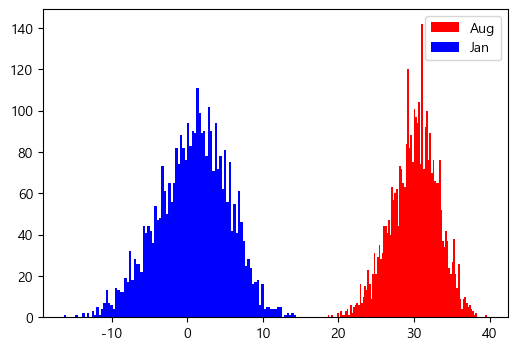

In [66]:
x1 = aug_df['최고기온']
x2 = jan_df['최고기온']
plt.hist(x1, bins = 100, color = 'r', label = 'Aug')
plt.hist(x2, bins = 100, color = 'b', label = 'Jan')
plt.legend()
plt.show()

> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있습니다. 
> * 1,8월 이외에 궁금한 달이 있다면 도전!

## box:기온 데이터 대략적인 통계정보 확인하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20230728120355_utf8.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)


In [2]:
df['최고기온'].describe()

count    41106.000000
mean        16.782978
std         10.973949
min        -16.300000
25%          7.300000
50%         18.600000
75%         26.300000
max         39.600000
Name: 최고기온, dtype: float64

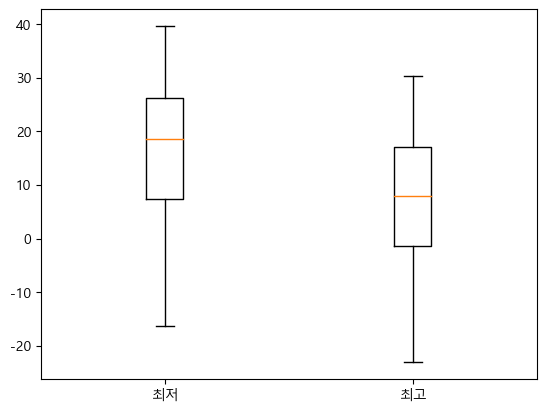

In [6]:
plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rcParams['axes.unicode_minus'] = False #부호

plt.boxplot(df[['최고기온', '최저기온']], labels=['최저', '최고'])
plt.show()

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('./data/ta_20230728120355_utf8.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)

# 날짜 데이터 Str => date 형으로 변환
#df['날짜'] = df['날짜'].astype('datetime64')
df['날짜'] = pd.to_datetime(df['날짜'])

In [11]:
# 파생변수 생성
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [16]:
cond = df['월'] == 1

In [17]:
df[cond]['평균기온']   # 이걸 리스트에 담아야 함.

92      -5.9
93      -7.7
94      -6.2
95      -7.5
96      -4.8
        ... 
41691   -7.3
41692   -6.0
41693   -1.8
41694   -0.9
41695    2.4
Name: 평균기온, Length: 3503, dtype: float64

In [19]:
avg_month = []
for i in range(1,13):
    #print(i)
    avg_month.append(df.loc[df['월'] == i, '평균기온'])

In [20]:
avg_month

[92      -5.9
 93      -7.7
 94      -6.2
 95      -7.5
 96      -4.8
         ... 
 41691   -7.3
 41692   -6.0
 41693   -1.8
 41694   -0.9
 41695    2.4
 Name: 평균기온, Length: 3503, dtype: float64,
 123     -2.2
 124     -3.1
 125     -8.0
 126     -7.0
 127     -8.5
         ... 
 41719    3.5
 41720    0.7
 41721    2.2
 41722    4.4
 41723    4.3
 Name: 평균기온, Length: 3191, dtype: float64,
 152       0.7
 153      -3.8
 154       1.9
 155       2.0
 156       3.0
          ... 
 41750     7.3
 41751     9.2
 41752    11.8
 41753    13.3
 41754    15.0
 Name: 평균기온, Length: 3503, dtype: float64,
 183       8.5
 184       8.3
 185       8.4
 186      11.3
 187       7.4
          ... 
 41780    10.2
 41781    12.9
 41782    15.7
 41783    13.2
 41784    12.7
 Name: 평균기온, Length: 3390, dtype: float64,
 213      16.3
 214      12.3
 215      13.6
 216      12.3
 217      13.9
          ... 
 41811    19.3
 41812    19.2
 41813    23.2
 41814    24.0
 41815    22.8
 Name: 평균기온, Length: 3503

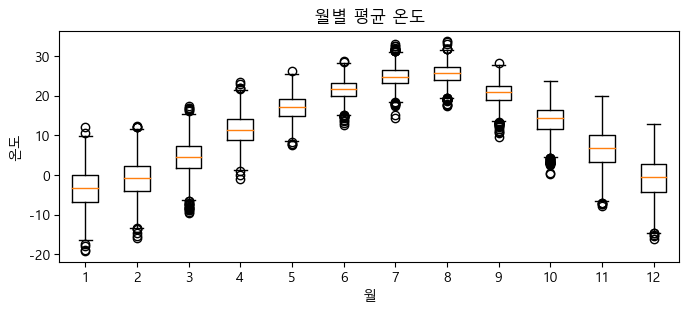

In [23]:
plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rcParams['axes.unicode_minus'] = False #부호

plt.figure(figsize=(8,3))
plt.boxplot(avg_month)
plt.xlabel('월')
plt.ylabel('온도')
plt.title('월별 평균 온도')
plt.show()